In [1]:
import pandas as pd

In [4]:
# read CSV file directly from a URL and save the result
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)

# display the first five rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
# check the shape of data frame (rows, columns)
data.shape

(200, 4)

In [9]:
# conventional way to import seaborn
import seaborn as sns

# allow matplotlipb to appear inline notebook
%matplotlib inline

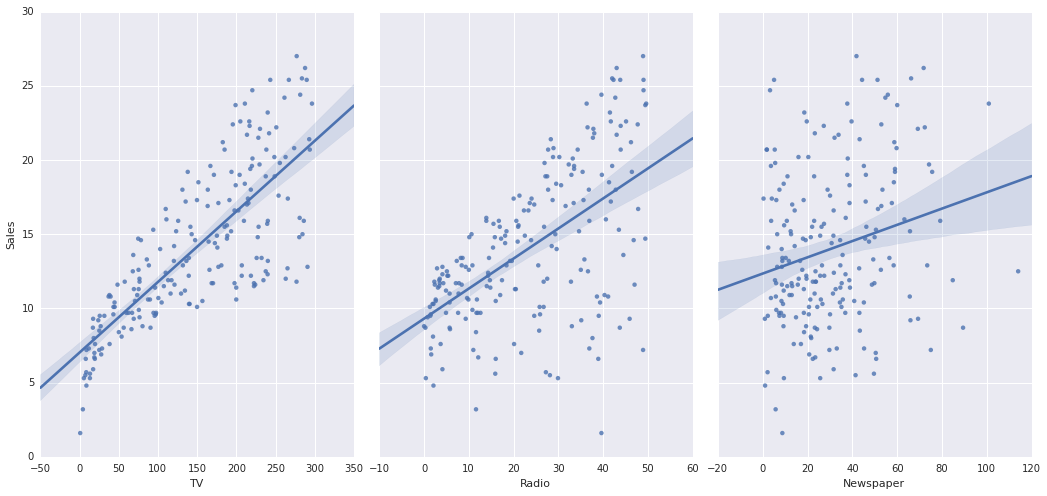

In [15]:
# Visualize the relation between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7,kind='reg')

In [19]:
# Preparing X and y using pandas
# create a python list of features
feature_cols = ['TV', 'Radio', 'Newspaper']
# use the list to select the subset of dataframe
X = data[feature_cols]
# alternative way to get X data
X = data[['TV', 'Radio', 'Newspaper']]
# print the first five rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
# check the type and shape of X
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [22]:
# select a series from dataframe
y = data['Sales']

# equivalent command to get series
y = data.Sales
# print the last five rows
y.tail()

196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, dtype: float64

In [24]:
# check type and shape of y
print type(y)
print y.shape

<class 'pandas.core.series.Series'>
(200,)


In [25]:
# split X and Y into training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [26]:
# default split is 75% for training and 25% for training
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


In [27]:
# Linear regression in sci-kit learn
from sklearn.linear_model import LinearRegression
# initiate the model
linreg = LinearRegression()
# fit the model to the training data(learn the coefficient)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# interpreting model coefficient
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [29]:
# pair the feature name with coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.04656456787415026),
 ('Radio', 0.1791581224508883),
 ('Newspaper', 0.0034504647111804204)]

In [31]:
# make prediction on testing set
y_pred = linreg.predict(X_test)

In [32]:
# model evaluation metrics for regression
# Let us create example prediction values and and three common evaluation matrices for regression
# define true and predicted values
true = [100,50,30,20]
pred = [90, 50, 50, 30]

In [33]:
# 1. Mean absolute error - Mean of the absolute value of errors
# Calculate MAE by hand
print (10+0+20+10)/4

# Calculate MAE by using scikit - learn
from sklearn import metrics
print metrics.mean_absolute_error(true, pred)


10
10.0


In [34]:
# 2. Mean squared error - mean of the squared error
# Calculate MSE by hand
print (10**2 + 0**2 + 20**2 + 10**2)/4

# Calculate MSE by using scikit - learn
print metrics.mean_squared_error(true, pred)

150
150.0


In [37]:
# 3. Root Mean squared error - root of the mean of the squared error
# Calculate RMSE by hand
import numpy as np
print np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4)

# Calculate RMSE by using scikit - learn
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139
12.2474487139


In [38]:
# Computing RMSE for our sales prediction
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


In [40]:
# Feature selection - remove newspaper from our feature set
feature_cols = ['TV', 'Radio']
# using the list to select the subset from dataframe
X= data[feature_cols]
# Select a series from data frame
y= data.Sales
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# fit the model on training data
linreg.fit(X_train, y_train)
# make prdiction on test set
y_pred = linreg.predict(X_test)
# calculate the RMSE of our prediction
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))


1.38790346994
